## Import Data

In [1]:
# Library untuk melakukan data analysis dan data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Untuk load dataset dari file .csv
emotion = pd.read_csv("Emotion.csv")

In [3]:
# Untuk melihat lima baris pertama dan terakhir pada data
emotion

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


## Exploratory Data Analysis

In [4]:
# Untuk melihat tipe data dan jumlah kolom
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


Dataset ini terdiri dari 2 variabel, dimana masing-masing variabel terdiri dari 20000 baris. Kedua variabel ini memiliki tipe data object.

In [5]:
# Untuk melihat jumlah unique values pada kolom kategorik variabel "label"
emotion["label"].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64

Terlihat bahwa distribusi dari variabel "label" tidak merata sehingga datanya imbalanced.

<ipython-input-6-067e7bf68791>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=emotion, palette="Spectral")


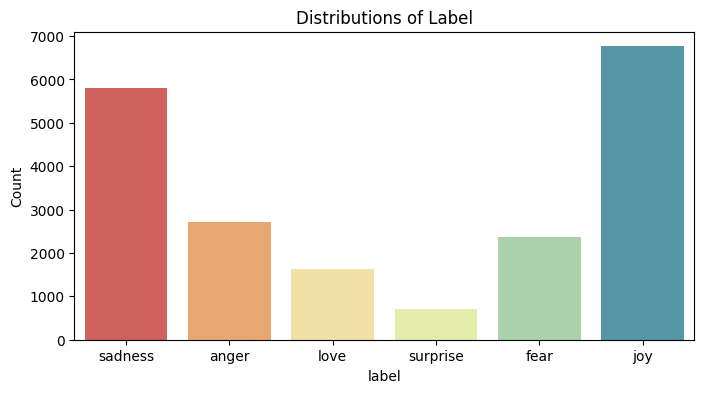

In [6]:
# Untuk melihat plot distribusi dari variabel "label"
plt.figure(figsize=(8, 4))
plt.title("Distributions of Label")
sns.countplot(x="label", data=emotion, palette="Spectral")
plt.ylabel("Count")
plt.show()

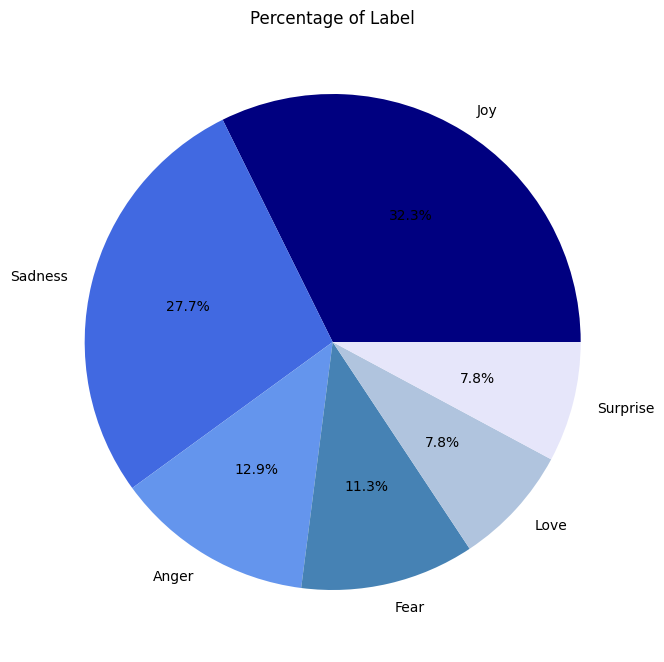

In [7]:
# Untuk melihat plot persentase distribusi dari variabel "label"
label_joy = emotion[emotion["label"]=="joy"]
label_sadness = emotion[emotion["label"]=="sadness"]
label_anger = emotion[emotion["label"]=="anger"]
label_fear = emotion[emotion["label"]=="fear"]
label_love = emotion[emotion["label"]=="love"]
label_surprise = emotion[emotion["label"]=="surprise"]

ptg_joy = (len(label_joy)/len(emotion))*100
ptg_sadness = (len(label_sadness)/len(emotion))*100
ptg_anger = (len(label_anger)/len(emotion))*100
ptg_fear = (len(label_fear)/len(emotion))*100
ptg_love = (len(label_love)/len(emotion))*100
ptg_surprise = (len(label_surprise)/len(emotion))*100

y = np.array([ptg_joy, ptg_sadness, ptg_anger, ptg_fear, ptg_love, ptg_love])
labels = ["Joy", "Sadness", "Anger", "Fear", "Love", "Surprise"]

plt.figure(figsize=(8,10))
plt.pie(y, labels=labels, autopct='%1.1f%%', colors=["navy", "royalblue", "cornflowerblue", "steelblue", "lightsteelblue", "lavender"])
plt.title('Percentage of Label')
plt.show()

Dari kedua plot tersebut, terlihat bahwa distribusi dari variabel label tidak merata. Label "Joy" memiliki persentase terbesar, yakni sekitar 32.3%, disusul oleh "Sadness" sebesar 27.7%, "Anger" sebesar 12.9%, "Fear" sebesar 11.3%, dan "Love" serta "Surprise" memiliki persentase yang sama, yaitu sebesar 7.8%. Hal tersebut menunjukkan bahwa dataset tersebut mengalami ketidakseimbangan (imbalanced).

## Data Preprocessing

In [8]:
# Untuk melihat apakah ada missing value
print(emotion.isna().sum())

text     0
label    0
dtype: int64


Dari output tersebut, terlihat bahwa tidak ada row yang memiliki missing value.

In [9]:
# Untuk melakukan label enconding dari variabel "label"
label_encoding = {
    "joy": 0,
    "sadness": 1,
    "anger": 2,
    "fear": 3,
    "love": 4,
    "surprise": 5
}

emotion["label"] = emotion["label"].map(label_encoding)

Pada data pre processing, encoding pada label dilakukan untuk mengubah kategori atau label menjadi numerik agar dapat digunakan sebagai input model dan lebih mudah dimengerti oleh model.

In [10]:
# Untuk mengubah teks ke dalam bentuk huruf kecil atau lowercase
emotion["text"] = emotion["text"].str.lower()
emotion

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,2
...,...,...
19995,im having ssa examination tomorrow in the morn...,1
19996,i constantly worry about their fight against n...,0
19997,i feel its important to share this info for th...,0
19998,i truly feel that if you are passionate enough...,0


Pada data pre processing, mengubah teks ke huruf kecil dilakukan untuk mengurangi dimensi fitur supaya datanya lebih konsisten. Dengan menghilangkan penggunaan huruf kapital, model dapat lebih optimal dalam mempelajari pola.

In [11]:
# Untuk menghapus tanda baca dari teks
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuations(emotion):
    emotion = str(emotion)
    for punct in puncts:
        if punct in emotion:
            emotion = emotion.replace(punct, f' {punct} ')
    return emotion

emotion["text"] = emotion["text"].apply(lambda text: remove_punctuations(text))
emotion

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,2
...,...,...
19995,im having ssa examination tomorrow in the morn...,1
19996,i constantly worry about their fight against n...,0
19997,i feel its important to share this info for th...,0
19998,i truly feel that if you are passionate enough...,0


Pada data pre processing, menghapus tanda baca pada teks dilakukan agar proses pemisahan kata pada saat tokenisasi dapat dilakukan dengan baik. Selain itu, tanda baca juga bisa dianggap sebagai noise dalam teks. Dengan menghilangkan tanda baca, model dapat lebih optimal dalam mempelajari pola dan mempercepat waktu pemrosesan.

In [12]:
# Untuk menghapus angka dari teks
def remove_numbers(emotion):
    if bool(re.search(r'\d', emotion)):
        x = re.sub('[0-9]{5,}', '#####', emotion)
        x = re.sub('[0-9]{4}', '####', emotion)
        x = re.sub('[0-9]{3}', '###', emotion)
        x = re.sub('[0-9]{2}', '##', emotion)
    return emotion

emotion["text"] = emotion["text"].apply(lambda text: remove_numbers(text))
emotion

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,2
...,...,...
19995,im having ssa examination tomorrow in the morn...,1
19996,i constantly worry about their fight against n...,0
19997,i feel its important to share this info for th...,0
19998,i truly feel that if you are passionate enough...,0


Pada data pre processing, menghapus angka pada teks dilakukan agar proses pemisahan kata pada saat tokenisasi dapat dilakukan dengan baik. Selain itu, angka juga bisa dianggap sebagai noise dalam teks. Dengan menghilangkan angka, kompleksitas model akan berkurang sehingga model dapat lebih optimal dalam mempelajari pola dan mempercepat waktu pemrosesan.

In [13]:
# Untuk menghapus link dari teks
def remove_urls(emotion):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', emotion)

emotion["text"] = emotion["text"].apply(lambda text: remove_urls(text))
emotion

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,2
...,...,...
19995,im having ssa examination tomorrow in the morn...,1
19996,i constantly worry about their fight against n...,0
19997,i feel its important to share this info for th...,0
19998,i truly feel that if you are passionate enough...,0


Pada data pre processing, menghapus link pada teks dilakukan agar proses pemisahan kata pada saat tokenisasi dapat dilakukan dengan baik. Selain itu, link juga bisa dianggap sebagai noise dalam teks. Dengan menghilangkan link, kompleksitas model akan berkurang sehingga model dapat lebih optimal dalam mempelajari pola dan mempercepat waktu pemrosesan.

In [14]:
# Library untuk melakukan Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
# Untuk melakukan proses lemmatization pada teks
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(emotion):
    emotion = str(emotion)
    pos_tagged_text = nltk.pos_tag(emotion.split())
    lemmatized_text = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
    return lemmatized_text

emotion["text"] = emotion["text"].apply(lambda text: lemmatize_words(text))
emotion

,text,label
0,i didnt feel humiliate,1
1,i can go from feel so hopeless to so damned ho...,1
2,im grab a minute to post i feel greedy wrong,2
3,i be ever feel nostalgic about the fireplace i...,4
4,i be feel grouchy,2
...,...,...
19995,im have ssa examination tomorrow in the mornin...,1
19996,i constantly worry about their fight against n...,0
19997,i feel it important to share this info for tho...,0
19998,i truly feel that if you be passionate enough ...,0


Pada data pre processing, proses lemmatization dilakukan untuk mengubah kata ke bentuk dasarnya. Dengan melakukan proses ini, model dapat lebih mudah melihat hubungan atau sentimen yang ada sehingga lebih akurat. Dibandingkan dengan stemming, lemmatization lebih baik karena stemming hanya memotong awalan atau akhiran kata tanpa memperhatikan arti sebenarnya.

Beberapa tahap preprocessing lain yang bisa dilakukan adalah dengan menghapus stopwords, frequent words, emoji, melakukan stemming, dan lainnya. 

## Split the Data

In [16]:
# Library untuk melakukan split terhadap dataset
from sklearn.model_selection import train_test_split

In [17]:
# Untuk membagi dataset menjadi train data, test data, dan validation data
x_train, x_temp, y_train, y_temp = train_test_split(emotion["text"], emotion["label"], train_size = 0.7, random_state = 42)
x_val, x_test, y_val, y_test  = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)

In [18]:
# Untuk melihat banyaknya train data, test data, dan validation data
print("Train data      (x, y): (", len(x_train), ",", len(y_train), ")")
print("Test data       (x, y): (", len(x_test), ",", len(y_test), ")")
print("Validation data (x, y): (", len(x_val), ",", len(y_val), ")")

Train data      (x, y): ( 14000 , 14000 )
Test data       (x, y): ( 3000 , 3000 )
Validation data (x, y): ( 3000 , 3000 )


Dari output tersebut, terlihat bahwa dari 20000 data berhasil dibagi menjadi 70% data training yaitu sebanyak 14000 data, 15% data validation yaitu sebanyak 3000 data, dan 15% data testing yaitu sebanyak 3000 data.

## Tokenization Process before Modeling

In [19]:
# Library untuk menggunakan tokenizer RoBERTa
from transformers import RobertaTokenizer

In [20]:
# Untuk menginisialisasi tokenizer sesuai dengan model RoBERTa
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [21]:
# Untuk melihat rata-rata dari length teks
print("Rata-rata length teks:", emotion['text'].apply(lambda x: len(x.split())).mean())

Rata-rata length teks: 19.13505


In [22]:
# Untuk menentukan length maksimum yang diterima oleh model
SEQ_LEN = 50

Length maksimum yang dapat diterima oleh model RoBERTa adalah 512 token. Sebelumnya telah dilihat bahwa rata-rata length dari teks adalah 19, sehingga ditentukan length maksimumnya senilai 50 agar tidak memerlukan lebih banyak memori dan sumber daya komputasi.

In [23]:
# Untuk melakukan proses tokenisasi untuk memastikan bahwa teks sesuai dengan struktur input model
def tokenize(data):
    input_ids =  []
    attention_masks = []

    for i, text in enumerate(data["text"]):
        tokens = tokenizer.encode_plus(text, max_length=SEQ_LEN,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')

        input_ids.append(np.asarray(tokens["input_ids"]).reshape(SEQ_LEN,))
        attention_masks.append(np.asarray(tokens["attention_mask"]).reshape(SEQ_LEN,))

    return (np.asarray(input_ids), np.asarray(attention_masks))

x_train = pd.DataFrame({"text": x_train})
x_val = pd.DataFrame({"text": x_val})
x_test = pd.DataFrame({"text": x_test})

train_input_ids, train_attention_masks = tokenize(x_train)
valid_input_ids, valid_attention_masks = tokenize(x_val)
test_input_ids, test_attention_masks = tokenize(x_test)

Sebelum masuk ke pemodelan, proses tokenisasi juga sangat penting pada NLP. Tokenisasi ini dilakukan untuk mengubah teks menjadi urutan token-token numerik yang dapat dimengerti oleh model. Selain itu, tokenisasi juga dapat membantu mengurangi kompleksitas dari data. Selain itu, tokenisasi juga mmemastikan bahwa setiap input teks memiliki panjang yang seragam.

In [24]:
# Untuk melakukan one hot encoding dimana tiap label berupa satu elemen vektor yang memiliki nilai 1 sesuai dengan kelasnya
def one_encode_labels(data):
    sentiment_values = set(data["label"].values)
    labels = []
    for index, row in data.iterrows():
        label = np.zeros((len(sentiment_values)))
        label[row["label"]] = 1
        labels.append(label)
    labels = np.asarray(labels)
    return labels

y_train = pd.DataFrame({"label": y_train})
y_val = pd.DataFrame({"label": y_val})
y_test = pd.DataFrame({"label": y_test})

y_train = one_encode_labels(y_train)
y_val = one_encode_labels(y_val)
y_test = one_encode_labels(y_test)

Sebelum masuk ke pemodelan, proses mengubah label ke dalam bentuk one hot encoding juga sangat penting pada NLP karena one hot encoding memastikan bahwa setiap kelas memiliki representasi yang unik dan sesuai sehingga mudah dimengerti oleh model.

## Create RoBERTa Model

In [25]:
# Library untuk menggunakan model RoBERTa
from transformers import TFAutoModel
import tensorflow as tf

In [26]:
# Library untuk membuat architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, BatchNormalization, Dense, Activation, Dropout, InputLayer, TimeDistributed

In [27]:
# Untuk menginisialisasi pre-trained RoBERTa model dari Hugging Face Transformers menggunakan TensorFlow
roberta = TFAutoModel.from_pretrained("roberta-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [28]:
# Untuk membuat architecture
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = roberta(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.LSTM(128)(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(768)(X)
X = tf.keras.layers.Activation("relu")(X)
X = tf.keras.layers.Dense(768)(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(6, activation='softmax', name='outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
model.layers[2].trainable = False

Pada kedua layer input, model menggunakan Input layer dan mengambil input tokens, attention mask, serta SEQ_LEN yang merupakan length dari sequence atau teks yang ingin diinput.

Pada layer embedding, model menggunakan pretrained RoBERTa yang sebelumnya telah diinisialisasi.

Pada layer LSTM pertama, model menggunakan 128 unit neuron dan menggunakan activation function defaultnya, yaitu linear.

Setelah layer LSTM, terdapat layer BatchNormalization yang digunakan untuk mempercepat konvergensi model.

Selain itu, terdapat layer Dense yang menggunakan 768 unit neuron. dengan activation function "ReLU".

Pada layer Dense kedua, layer ini menggunakan 768 unit neuron dan diikuti oleh layer Dropout dengan rate 0.1 untuk mencegah terjadinya overfitting.

Terakhir, pada layer output, model menggunakan layer Dense dengan 6 unit neuron sesuai dengan jumlah labelnya dan menggunakan activation function softmax.

Meskipun demikian, perlu digarisbawahi bahwa layer embedding menggunakan RoBERTa tidak dapat ditrain ("trainable=False") yang artinya bobot dari layer tersebut tidak akan diperbarui selama training karena ingin mempertahankan bobot yang telah di-pretrain sebelumnya.


In [29]:
# Untuk menampilkan summary model atau arsitektur yang telah dibuat
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 50)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['input_ids[0][0]',           
 aModel)                     ngAndCrossAttentions(last_   32         'attention_mask[0][0]']      
                             hidden_state=(None, 50, 76                                       

Total params diperoleh dari jumlah parameter dari masing-masing model. Nilai non-trainable params nya 124645888 menandakan bahwa selama pelatihan ada model atau layer yang difreeze.

In [30]:
# Library untuk menggunakan optimizer AdamWeightDecay
from transformers import AdamWeightDecay

In [31]:
# Untuk mengubah parameter dari optimizer
opt = AdamWeightDecay(2e-03, beta_1=0.8, beta_2=0.9, weight_decay_rate=0.0001)

In [32]:
# Untuk mengcompile model
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

Parameter yang digunakan pada saat mengompile model antara lain adalah optimizer "AdamWeightDecay" karena memberikan performa yang lebih baik, kemudian loss "CategoricalCrossentropy" karena ada enam kelas pada variabel "label" dimana labelnya merupakan One Hot dan mengikuti activation function softmax, serta yang terakhir metrics "Accuracy" untuk menampilkan accuracy yang diperoleh.

In [33]:
history = model.fit((train_input_ids, train_attention_masks),y_train,
                    epochs=7,
                    batch_size=32,
                    validation_data=((valid_input_ids,valid_attention_masks), y_val))

Epoch 1/7
438/438 [==============================] - 83s 149ms/step - loss: 1.3897 - accuracy: 0.4928 - val_loss: 1.1958 - val_accuracy: 0.5660
Epoch 2/7
438/438 [==============================] - 73s 166ms/step - loss: 0.9415 - accuracy: 0.6669 - val_loss: 1.4527 - val_accuracy: 0.6430
Epoch 3/7
438/438 [==============================] - 73s 167ms/step - loss: 0.7557 - accuracy: 0.7314 - val_loss: 0.7486 - val_accuracy: 0.7723
Epoch 4/7
438/438 [==============================] - 63s 144ms/step - loss: 0.6499 - accuracy: 0.7698 - val_loss: 0.5913 - val_accuracy: 0.8020
Epoch 5/7
438/438 [==============================] - 63s 143ms/step - loss: 0.5795 - accuracy: 0.7975 - val_loss: 0.5226 - val_accuracy: 0.8170
Epoch 6/7
438/438 [==============================] - 65s 148ms/step - loss: 0.5205 - accuracy: 0.8135 - val_loss: 0.5857 - val_accuracy: 0.8157
Epoch 7/7
438/438 [==============================] - 63s 143ms/step - loss: 0.4956 - accuracy: 0.8269 - val_loss: 0.5199 - val_accuracy:

In [34]:
# Untuk menyimpan history dari training model yang sebelumnya telah dilakukan
hist_dict = history.history
train_loss = hist_dict["loss"]
val_loss = hist_dict["val_loss"]
train_acc = hist_dict["accuracy"]
val_acc = hist_dict["val_accuracy"]

In [35]:
# Untuk menyimpan range epoch dari training model sebelumnya
epochs_loss = range(1, len(train_loss)+1)
epochs_acc = range(1, len(train_acc)+1)

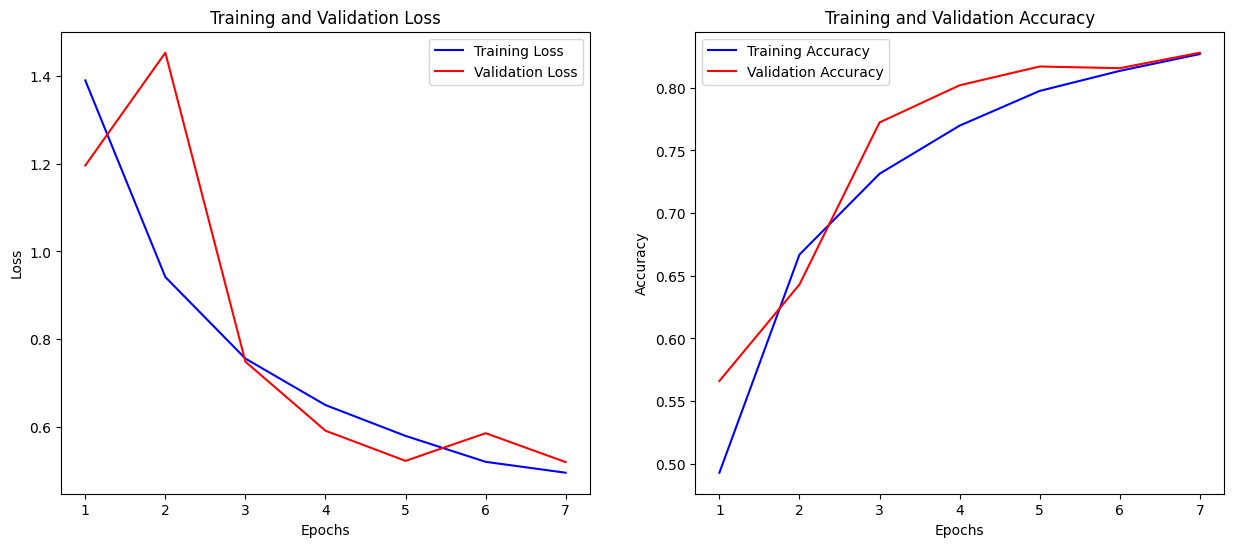

In [36]:
# Untuk membuat plot training dan validation loss serta training dan validation accuracy
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(epochs_loss, train_loss, 'b-', label="Training Loss")
axs[0].plot(epochs_loss, val_loss, 'r-', label="Validation Loss")
axs[0].set_title("Training and Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(epochs_acc, train_acc, 'b-', label="Training Accuracy")
axs[1].plot(epochs_acc, val_acc, 'r-', label="Validation Accuracy")
axs[1].set_title("Training and Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

plt.show()

Setelah ditrain sebanyak 7 epoch dan menggunakan 32 sampel data setiap batchnya, diperoleh hasil train accuracy nya sebesar 0.8269 dan val accuracy nya sebesar 0.8280. Sementara itu, diperoleh hasil train loss nya sebesar 0.4956 dan val loss nya sebesar 0.5199.

Kedua nilai loss yang diperoleh memang memiliki perbedaan yang tidak terlalu signifikan, begitupula dengan kedua nilai accuracy. Sehingga, sampai saat ini belum bisa dikatakan kalau model menunjukkan adanya indikasi overfitting atau underfitting.

## Evaluate the Model using Data Testing

In [50]:
# Library untuk membuat classification report dan confusion matrix pada hasil prediksi
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
# Untuk melakukan evaluasi model yang telah ditraining sebelumnya menggunakan data testing
test_loss, test_accuracy = model.evaluate((test_input_ids, test_attention_masks), y_test)
print(f"Test loss     : " + str(test_loss))
print(f"Test accuracy : " + str(test_accuracy))

94/94 [==============================] - 10s 110ms/step - loss: 0.5325 - accuracy: 0.8373
Test loss     : 0.5324966311454773
Test accuracy : 0.8373333215713501


Setelah model dievaluasi menggunakan data testing, diperoleh nilai test accuracy nya sebesar 0.84 dan nilai test loss nya sebesar 0.53. Hal ini berarti model cukup baik dalam memprediksi, tetapi masih bisa ditingkatkan lagi performanya dalam memprediksi.

In [39]:
# Untuk melakukan prediksi menggunakan training model sebelumnya
predictions = model.predict((test_input_ids, test_attention_masks))
predictions_labels = np.argmax(predictions, axis=1)

94/94 [==============================] - 14s 107ms/step


In [49]:
# Untuk mengembalikan data yang telah dilakukan one hot encoding ke dalam bentuk aslinya
y_test = np.argmax(y_test, axis=1)

In [53]:
# Untuk menampilkan hasil prediksi menggunakan confusion matrix
print(confusion_matrix(y_test, predictions_labels))

[[892  32  15   6  49  19]
 [ 47 736  46  17   4   1]
 [ 24  40 355   9   2   0]
 [ 13  24  16 253   4  33]
 [ 47  15   8   2 182   0]
 [  7   1   3   4   0  94]]


In [47]:
# Untuk menampilkan hasil prediksi menggunakan classification report
print(classification_report(y_test, predictions_labels, target_names=["joy", "sadness", "anger", "fear", "love", "surprise"],))

              precision    recall  f1-score   support

         joy       0.87      0.88      0.87      1013
     sadness       0.87      0.86      0.87       851
       anger       0.80      0.83      0.81       430
        fear       0.87      0.74      0.80       343
        love       0.76      0.72      0.74       254
    surprise       0.64      0.86      0.73       109

    accuracy                           0.84      3000
   macro avg       0.80      0.81      0.80      3000
weighted avg       0.84      0.84      0.84      3000



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model RoBERTa cukup baik, yaitu 84%.
1.   Kategori Joy  ->
Kategori ini memiliki precision score sebesar 87%, yang artinya dari seluruh text yang diprediksi memiliki label "Joy", 87% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 88%, yang artinya model berhasil memprediksi benar sebesar 88% dari semua text yang memiliki label "Joy". Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 87%.
2.   Kategori Sadness ->
Kategori ini memiliki precision score sebesar 87%, yang artinya dari seluruh text yang diprediksi memiliki label "Sadness", 87% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 86%, yang artinya model berhasil memprediksi benar sebesar 86% dari semua text yang memiliki label "Sadness". Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 87%.
3. Kategori Anger ->
Kategori ini memiliki precision score sebesar 80%, yang artinya dari seluruh text yang diprediksi memiliki label "Anger", 80% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 83%, yang artinya model berhasil memprediksi benar sebesar 83% dari semua text yang memiliki label "Anger". Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 81%.
4. Kategori Fear ->
Kategori ini memiliki precision score sebesar 87%, yang artinya dari seluruh text yang diprediksi memiliki label "Fear", 87% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 74%, yang artinya model berhasil memprediksi benar sebesar 74% dari semua text yang memiliki label "Fear". Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 80%.
5. Kategori Love ->
Kategori ini memiliki precision score sebesar 76%, yang artinya dari seluruh text yang diprediksi memiliki label "Love", 76% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 72%, yang artinya model berhasil memprediksi benar sebesar 72% dari semua text yang memiliki label "Love". Model ini juga memiliki f1-score yang lumayan rendah dibandingkan lainnya, yaitu sebesar 74%.
6. Kategori Surprise ->
Kategori ini memiliki precision score sebesar 64%, yang artinya dari seluruh text yang diprediksi memiliki label "Surprise", 64% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 86%, yang artinya model berhasil memprediksi benar sebesar 86% dari semua text yang memiliki label "Surprise". Model ini juga memiliki f1-score yang lumayan rendah dibandingkan lainnya, yaitu sebesar 73%.

## Kesimpulan

Setelah melakukan training dan evaluasi menggunakan model pretrained RoBERTa, beberapa hal yang dapat disimpulkan adalah sebagai berikut.
1. Terdapat data yang imbalanced terutama pada kategori label "anger", "fear", "love", dan "surprise".
2. Model pretrained RoBERTa tidak ditrain untuk tetap mempertahankan bobot aslinya.
3. Model RoBERTa memiliki accuracy yang cukup baik, tetapi masih kurang baik dalam memprediksi kelas minoritas seperti pada kategori label "anger", "fear", "love", dan "surprise".
4. Untuk meningkatkan akurasi prediksi, bisa melakukan resampling pada kelas minoritas agar model dapat mempelajari pola dengan baik, khususnya pada kelas tersebut.

## Referensi

Sudalai Rajkumar. (2019, August 20). Getting started with Text Preprocessing. https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing

Analytics Vidhya. (2023, April 26). Text Preprocessing in NLP with Python Codes. https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

Hugging Face. (n.d.). RoBERTa. https://huggingface.co/docs/transformers/model_doc/roberta

https://github.com/tawhidwasik08/Multiclass-Text-Classifiction-with-Tensorflow-RoBERTa/tree/main